In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sensor-fault-detection.csv')
df = df['Timestamp;SensorId;Value'].str.split(';', expand=True)
df.columns = ['Timestamp', 'SensorId', 'Value']


In [ ]:
df.head()

,Timestamp,SensorId,Value
0,2017-03-01T23:20:00+03:00,1,18.4798069
1,2017-03-02T04:00:00+03:00,1,19.53911209
2,2017-03-23T06:25:00+03:00,1,19.25019836
3,2017-03-23T19:35:00+03:00,1,18.96128464
4,2017-04-04T15:10:00+03:00,1,25.32162285


In [ ]:
df.shape

(62629, 3)

In [ ]:
df.dtypes

,0
Timestamp,object
SensorId,object
Value,object


In [ ]:
df.describe()

,Timestamp,SensorId,Value
count,62629,62629,62629
unique,62629,1,324
top,2017-05-07T20:40:00+03:00,1,26.96139145
freq,1,62629,694


In [ ]:
df.isnull().sum()

,0
Timestamp,0
SensorId,0
Value,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [4]:
df['SensorId'] = pd.to_numeric(df['SensorId'], errors='coerce').astype('Int64')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [ ]:
df.dtypes

,0
Timestamp,"datetime64[ns, UTC+03:00]"
SensorId,Int64
Value,float64


In [5]:
print(df['Timestamp'].min(), df['Timestamp'].max())


2016-08-01 01:00:00+03:00 2017-09-01 00:55:00+03:00


In [ ]:
df['SensorId'].nunique()

1

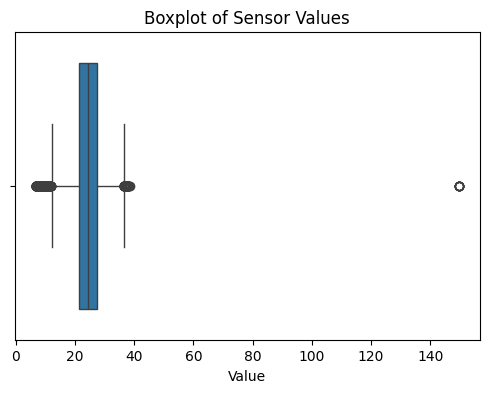

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Sensor Values')
plt.show()


In [6]:
from scipy.stats import zscore

df['z_score'] = zscore(df['Value'])
outliers = df[np.abs(df['z_score']) > 3]  # Threshold of 3 std deviations
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 526


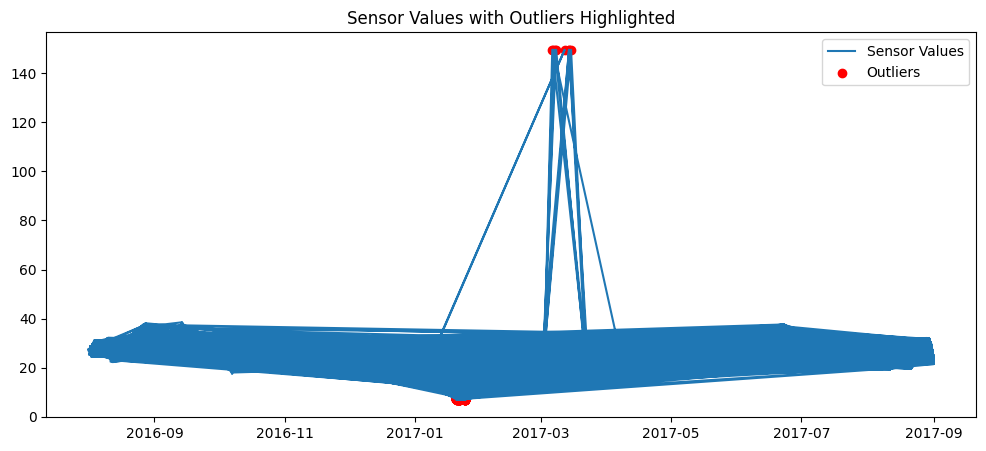

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['Value'], label='Sensor Values')
plt.scatter(outliers['Timestamp'], outliers['Value'], color='red', label='Outliers')
plt.legend()
plt.title('Sensor Values with Outliers Highlighted')
plt.show()

In [ ]:
threshold = 140
outliers = df['Value'] > threshold
print(f"Number of values above {threshold}: {outliers.sum()}")


Number of values above 140: 8


In [ ]:
threshold = 8
outliers = df['Value'] <= threshold
print(f"Number of values above {threshold}: {outliers.sum()}")


Number of values above 8: 518


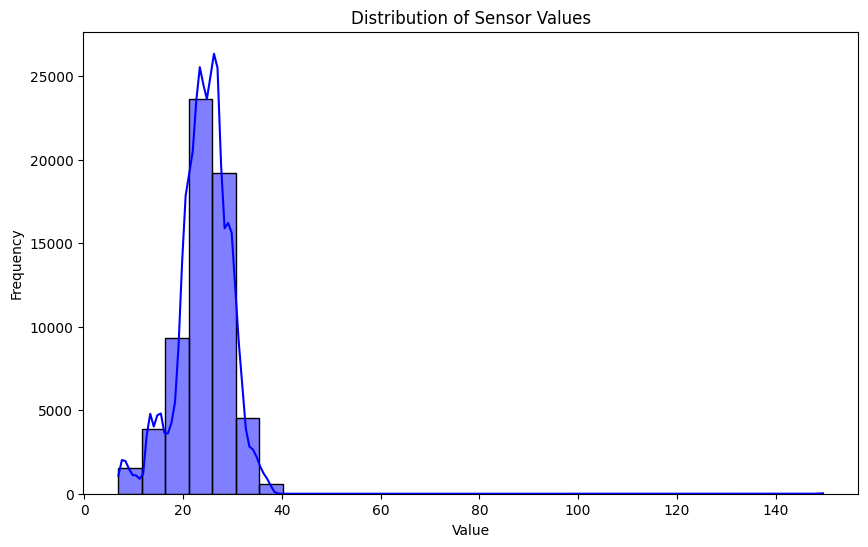

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sensor Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
df['Value_capped'] = df['Value'].clip(lower=8, upper=140)


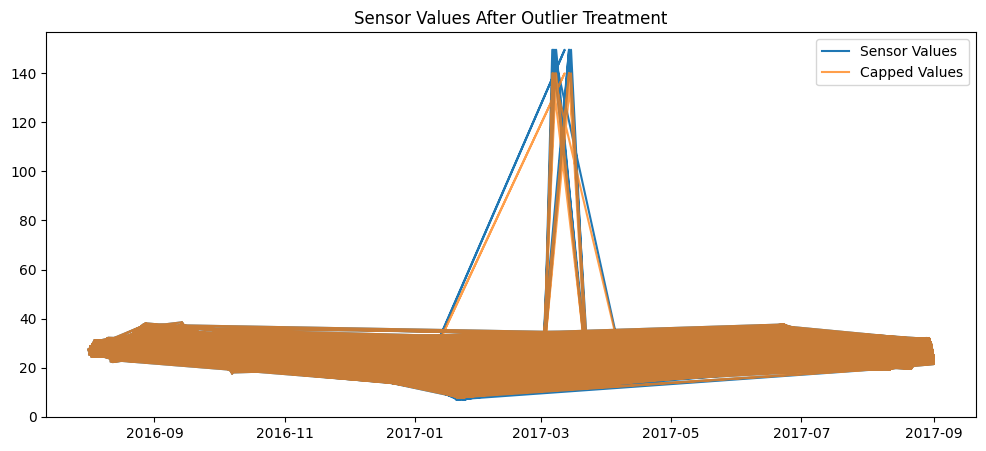

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['Value'], label='Sensor Values')
plt.plot(df['Timestamp'], df['Value_capped'], label='Capped Values', alpha=0.75)
plt.legend()
plt.title('Sensor Values After Outlier Treatment')
plt.show()

In [12]:
print("Original Data Summary:")
print(df['Value'].describe())

print("\nCapped Data Summary:")
print(df['Value_capped'].describe())


Original Data Summary:
count    62629.000000
mean        24.203861
std          5.411599
min          6.886155
25%         21.369419
50%         24.550188
75%         27.443794
max        149.601822
Name: Value, dtype: float64

Capped Data Summary:
count    62629.000000
mean        24.207008
std          5.370745
min          8.000000
25%         21.369419
50%         24.550188
75%         27.443794
max        140.000000
Name: Value_capped, dtype: float64


In [13]:
mask = (df['Value'] < 8) | (df['Value'] > 140)
df['Value_imputed'] = df['Value'].copy()
df.loc[mask, 'Value_imputed'] = df['Value'].rolling(window=24, center=True, min_periods=1).median()[mask]

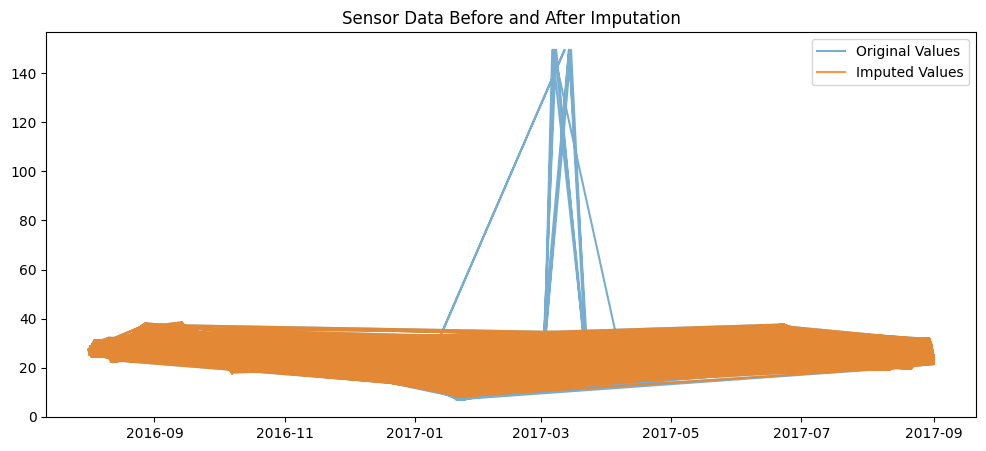

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['Value'], label='Original Values', alpha=0.6)
plt.plot(df['Timestamp'], df['Value_imputed'], label='Imputed Values', alpha=0.8)
plt.legend()
plt.title('Sensor Data Before and After Imputation')
plt.show()

In [15]:
print("Original Data Summary:")
print(df['Value'].describe())
print("\nImputed Data Summary:")
print(df['Value_imputed'].describe())

Original Data Summary:
count    62629.000000
mean        24.203861
std          5.411599
min          6.886155
25%         21.369419
50%         24.550188
75%         27.443794
max        149.601822
Name: Value, dtype: float64

Imputed Data Summary:
count    62629.000000
mean        24.289090
std          5.019321
min          8.032794
25%         21.465771
50%         24.550188
75%         27.443794
max         38.474796
Name: Value_imputed, dtype: float64


In [16]:
df['Value_original'] = df['Value']

In [17]:
df['Value'] = df['Value_imputed']

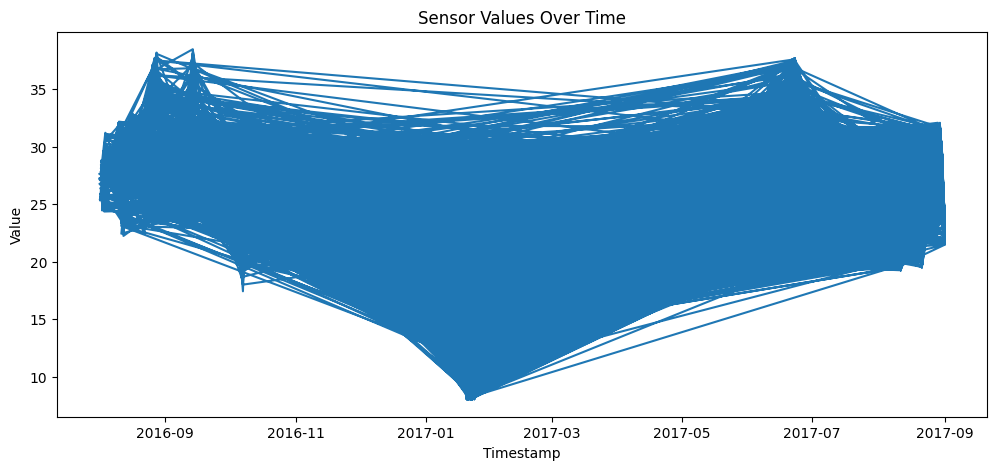

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['Value'])
plt.title('Sensor Values Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()


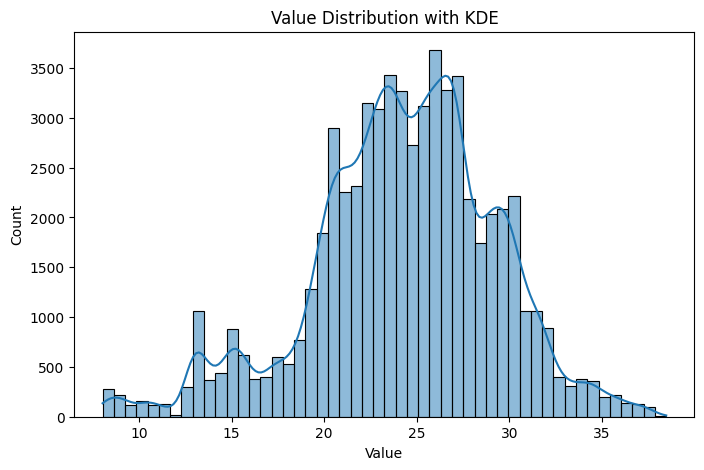

In [19]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Value Distribution with KDE')
plt.show()


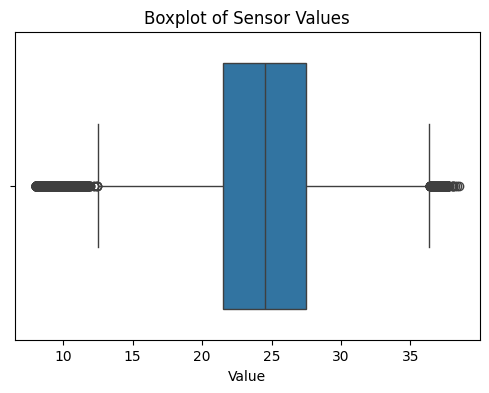

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Sensor Values')
plt.show()


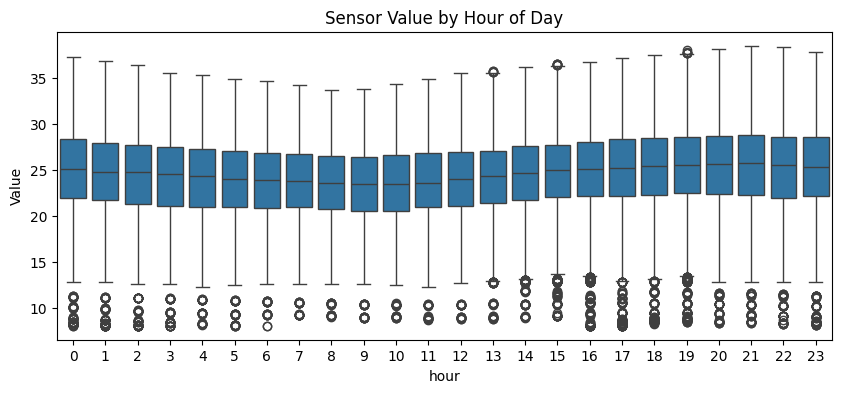

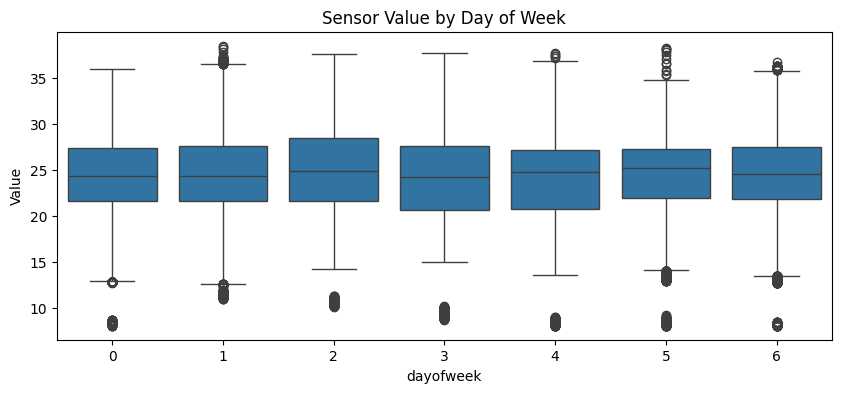

In [21]:
df['hour'] = df['Timestamp'].dt.hour
df['dayofweek'] = df['Timestamp'].dt.dayofweek

plt.figure(figsize=(10,4))
sns.boxplot(x='hour', y='Value', data=df)
plt.title('Sensor Value by Hour of Day')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='dayofweek', y='Value', data=df)
plt.title('Sensor Value by Day of Week')
plt.show()


In [22]:
df['lag_1'] = df['Value'].shift(1)
print(df[['Value', 'lag_1']].corr())


          Value     lag_1
Value  1.000000  0.711907
lag_1  0.711907  1.000000


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
df['lag_1'] = df['Value'].shift(1)
df['lag_2'] = df['Value'].shift(2)
df['lag_3'] = df['Value'].shift(3)

In [25]:
window_sizes = [3, 6, 12, 24]  # Adjust based on your data frequency

for window in window_sizes:
    df[f'roll_mean_{window}'] = df['Value'].rolling(window=window, min_periods=1).mean()
    df[f'roll_std_{window}'] = df['Value'].rolling(window=window, min_periods=1).std()
    df[f'roll_min_{window}'] = df['Value'].rolling(window=window, min_periods=1).min()
    df[f'roll_max_{window}'] = df['Value'].rolling(window=window, min_periods=1).max()


In [26]:
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['dayofweek'] = df['Timestamp'].dt.dayofweek
df['day'] = df['Timestamp'].dt.day
df['month'] = df['Timestamp'].dt.month


In [27]:
df['diff_1'] = df['Value'].diff(1)
df['pct_change_1'] = df['Value'].pct_change(1)


In [28]:
df.fillna(method='bfill', inplace=True)

/tmp/ipython-input-3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [29]:
feature_cols = [col for col in df.columns if col not in ['Timestamp']]
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])


In [33]:
import pandas as pd

# Example assuming your timestamps have timezone UTC+03:00
split_date = pd.Timestamp('2025-05-01 00:00:00').tz_localize('UTC+03:00')

train = df[df['Timestamp'] < split_date]
test = df[df['Timestamp'] >= split_date]

print(f"Training samples: {len(train)}, Testing samples: {len(test)}")


Training samples: 62629, Testing samples: 0


In [34]:
print(df['Timestamp'].min())
print(df['Timestamp'].max())


2016-08-01 01:00:00+03:00
2017-09-01 00:55:00+03:00


In [35]:
import pandas as pd

# Given min and max timestamps
min_ts = pd.Timestamp('2016-08-01 01:00:00+03:00')
max_ts = pd.Timestamp('2017-09-01 00:55:00+03:00')

# Total duration
duration = max_ts - min_ts

# 80% point
split_date = min_ts + duration * 0.8

print("Suggested split date:", split_date)


Suggested split date: 2017-06-13 20:08:00+03:00


In [36]:
train = df[df['Timestamp'] < split_date]
test = df[df['Timestamp'] >= split_date]

print(f"Training samples: {len(train)}, Testing samples: {len(test)}")


Training samples: 40166, Testing samples: 22463


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Features and target for training and testing
feature_cols = [col for col in df.columns if col not in ['Timestamp', 'Value']]
X_train = train[feature_cols]
y_train = train['Value']

X_test = test[feature_cols]
y_test = test['Value']

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")




Test MSE: 0.0000
Test MAE: 0.0002


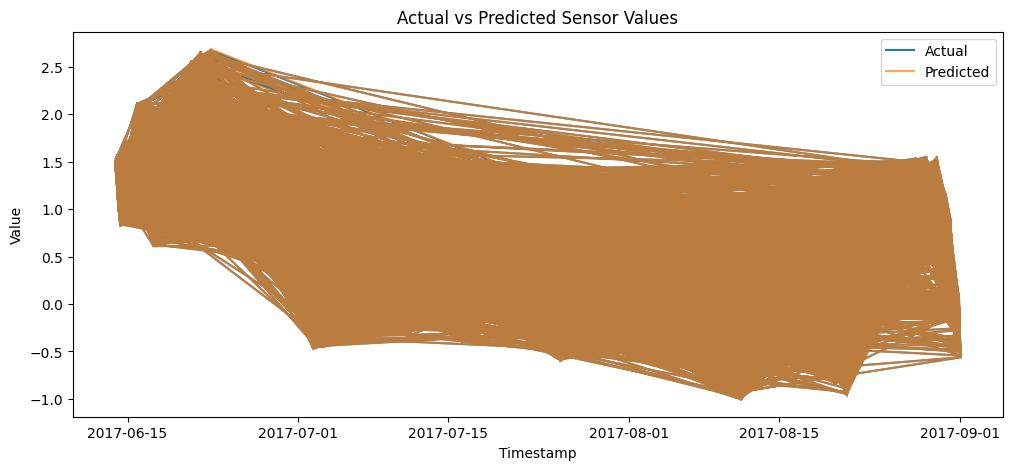

In [38]:
# Visualize predictions vs actual
plt.figure(figsize=(12,5))
plt.plot(test['Timestamp'], y_test, label='Actual')
plt.plot(test['Timestamp'], y_pred, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Sensor Values')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []
mae_scores = []

for train_index, val_index in tscv.split(df):
    train_cv, val_cv = df.iloc[train_index], df.iloc[val_index]

    X_train_cv = train_cv[feature_cols]
    y_train_cv = train_cv['Value']
    X_val_cv = val_cv[feature_cols]
    y_val_cv = val_cv['Value']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_val_cv)

    mse_scores.append(mean_squared_error(y_val_cv, y_pred_cv))
    mae_scores.append(mean_absolute_error(y_val_cv, y_pred_cv))

print(f"Cross-validated MSE: {np.mean(mse_scores):.6f} ± {np.std(mse_scores):.6f}")
print(f"Cross-validated MAE: {np.mean(mae_scores):.6f} ± {np.std(mae_scores):.6f}")


Cross-validated MSE: 0.000033 ± 0.000045
Cross-validated MAE: 0.000156 ± 0.000121


In [41]:
import numpy as np
importances = model.feature_importances_
feature_names = feature_cols
sorted_indices = np.argsort(importances)[::-1]

print("Feature importance ranking:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


Feature importance ranking:
Value_imputed: 0.9409
z_score: 0.0253
Value_original: 0.0179
Value_capped: 0.0159
roll_min_3: 0.0000
roll_max_3: 0.0000
roll_max_12: 0.0000
roll_max_6: 0.0000
roll_max_24: 0.0000
roll_min_6: 0.0000
hour: 0.0000
day: 0.0000
dayofweek: 0.0000
roll_min_24: 0.0000
roll_min_12: 0.0000
month: 0.0000
pct_change_1: 0.0000
diff_1: 0.0000
roll_std_6: 0.0000
lag_2: 0.0000
lag_1: 0.0000
lag_3: 0.0000
roll_mean_12: 0.0000
roll_mean_24: 0.0000
roll_std_24: 0.0000
roll_std_3: 0.0000
roll_std_12: 0.0000
roll_mean_3: 0.0000
roll_mean_6: 0.0000
minute: 0.0000
SensorId: 0.0000


In [42]:
# List of important features based on your importance report
important_features = ['Value_imputed', 'z_score', 'Value_original', 'Value_capped']

# Filter your dataframe to keep only important features + Timestamp & target
selected_features = important_features  # Features to use for modeling

X_train_sel = train[selected_features]
X_test_sel = test[selected_features]
y_train = train['Value']
y_test = test['Value']


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X_train_sel, y_train)

y_pred_gbm = gbm.predict(X_test_sel)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)

print(f"Gradient Boosting Test MSE: {mse_gbm:.6f}")
print(f"Gradient Boosting Test MAE: {mae_gbm:.6f}")


Gradient Boosting Test MSE: 0.000074
Gradient Boosting Test MAE: 0.006292


/tmp/ipython-input-2576631274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['anomaly'] = anomaly_labels


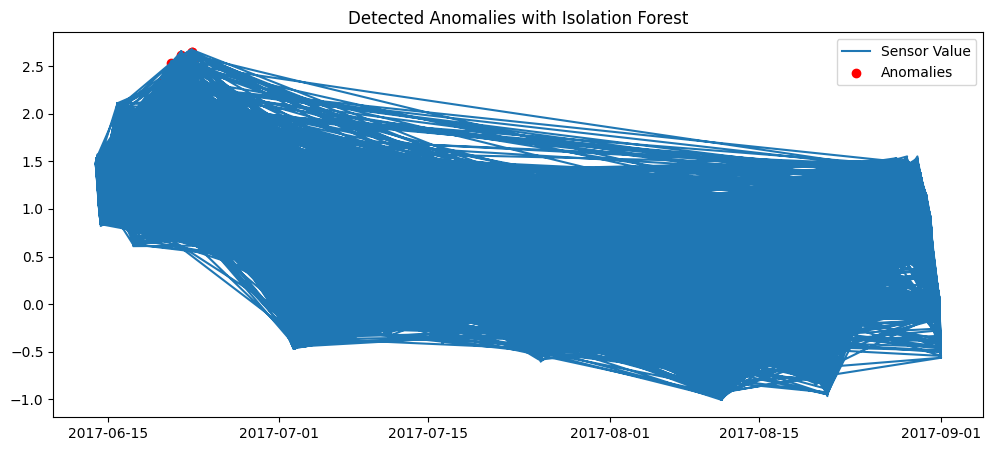

In [44]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_train)

anomaly_labels = iso.predict(X_test)  # -1 anomalies, 1 normal
test['anomaly'] = anomaly_labels

plt.figure(figsize=(12,5))
plt.plot(test['Timestamp'], test['Value'], label='Sensor Value')
plt.scatter(test[test['anomaly'] == -1]['Timestamp'],
            test[test['anomaly'] == -1]['Value'], color='red', label='Anomalies')
plt.legend()
plt.title('Detected Anomalies with Isolation Forest')
plt.show()
